In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
import math
import random
import pandas as pd


In [3]:
df = pd.read_csv("9500massv2.csv")
display(df)

,centroid_positions,cluster_mass,centroid_filepath,gravitational_constant
0,"[0.22739772498607635, 0.1902884989976883, 0.99...",0.464796,/media/andrius/FastBoi/bakis_data/final22k/tra...,15.253733
1,"[0.1919887810945511, 0.3517642021179199, 0.206...",0.434281,/media/andrius/FastBoi/bakis_data/final22k/tra...,15.253733
2,"[0.34190982580184937, 0.9810489416122437, 0.99...",0.498421,/media/andrius/FastBoi/bakis_data/final22k/tra...,15.253733
3,"[0.29752594232559204, 0.48034632205963135, 0.2...",0.408912,/media/andrius/FastBoi/bakis_data/final22k/tra...,15.253733
4,"[0.24182675778865814, 0.34177276492118835, 0.3...",0.444173,/media/andrius/FastBoi/bakis_data/final22k/tra...,15.253733
...,...,...,...,...
9495,"[0.3458230197429657, 0.004848591983318329, 0.9...",0.543117,/media/andrius/FastBoi/bakis_data/final22k/tra...,15.253733
9496,"[0.29010656476020813, 0.24887681007385254, 0.3...",0.580698,/media/andrius/FastBoi/bakis_data/final22k/tra...,15.253733
9497,"[0.31616008281707764, 0.45374271273612976, 0.9...",0.493106,/media/andrius/FastBoi/bakis_data/final22k/tra...,15.253733
9498,"[0.2502706050872803, 0.3045426905155182, 0.926...",0.498262,/media/andrius/FastBoi/bakis_data/final22k/tra...,15.253733


In [8]:
sizes = []
for size in df["cluster_mass"]:
    sizes.append(size)
sizes = np.array(sizes)
print(f"mean={sizes.mean()}")
print(f"median={np.median(sizes)}")
print(f"min={sizes.min()}")
print(f"max={sizes.max()}")
print(f"stdev={sizes.std()}")

mean=0.4738210301571771
median=0.47512011229991913
min=0.2226898223161697
max=0.6739232540130615
stdev=0.05795771630768644


In [10]:
size_variation_df = pd.read_csv("./cluster_variation_experiment_full.csv")
display(size_variation_df)

,Unnamed: 0,song_under_test_total_samples,song_under_test_correct_samples,song_under_test_top5_correct_samples,other_total_samples,other_correct_samples,other_top5_correct_samples,cluster_reduction
0,0,151,148,150,13510,13042,13345,0.000000
1,1,151,147,149,13510,13023,13346,0.010345
2,2,151,147,149,13510,13029,13350,0.020690
3,3,151,145,149,13510,13033,13343,0.031034
4,4,151,145,149,13510,13039,13348,0.041379
5,5,151,146,149,13510,13038,13346,0.051724
6,6,151,139,147,13510,13024,13347,0.062069
7,7,151,135,148,13510,13027,13355,0.072414
8,8,151,130,145,13510,13036,13344,0.082759
9,9,151,121,145,13510,13027,13346,0.093103


In [13]:
size_variation_df["song_under_test_accuracy"] = size_variation_df["song_under_test_correct_samples"] / size_variation_df["song_under_test_total_samples"]
size_variation_df["song_under_test_top5_accuracy"] = size_variation_df["song_under_test_top5_correct_samples"] / size_variation_df["song_under_test_total_samples"]
size_variation_df["others_accuracy"] = size_variation_df["other_correct_samples"] / size_variation_df["other_total_samples"]
size_variation_df["others_top5_accuracy"] = size_variation_df["other_top5_correct_samples"] / size_variation_df["other_total_samples"]
display(size_variation_df)

,Unnamed: 0,song_under_test_total_samples,song_under_test_correct_samples,song_under_test_top5_correct_samples,other_total_samples,other_correct_samples,other_top5_correct_samples,cluster_reduction,song_under_test_accuracy,song_under_test_top5_accuracy,others_accuracy,others_top5_accuracy
0,0,151,148,150,13510,13042,13345,0.000000,0.980132,0.993377,0.965359,0.987787
1,1,151,147,149,13510,13023,13346,0.010345,0.973510,0.986755,0.963953,0.987861
2,2,151,147,149,13510,13029,13350,0.020690,0.973510,0.986755,0.964397,0.988157
3,3,151,145,149,13510,13033,13343,0.031034,0.960265,0.986755,0.964693,0.987639
4,4,151,145,149,13510,13039,13348,0.041379,0.960265,0.986755,0.965137,0.988009
5,5,151,146,149,13510,13038,13346,0.051724,0.966887,0.986755,0.965063,0.987861
6,6,151,139,147,13510,13024,13347,0.062069,0.920530,0.973510,0.964027,0.987935
7,7,151,135,148,13510,13027,13355,0.072414,0.894040,0.980132,0.964249,0.988527
8,8,151,130,145,13510,13036,13344,0.082759,0.860927,0.960265,0.964915,0.987713
9,9,151,121,145,13510,13027,13346,0.093103,0.801325,0.960265,0.964249,0.987861


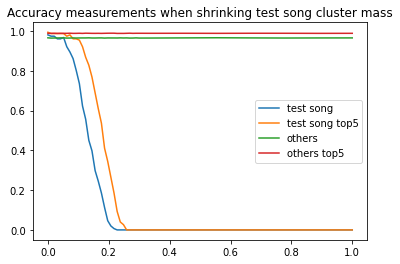

In [25]:
plt.title("Accuracy measurements when shrinking test song cluster mass")
plt.plot(size_variation_df['cluster_reduction'], size_variation_df['song_under_test_accuracy'], label='test song')
plt.plot(size_variation_df['cluster_reduction'], size_variation_df['song_under_test_top5_accuracy'], label='test song top5')
plt.plot(size_variation_df['cluster_reduction'], size_variation_df['others_accuracy'], label='others')
plt.plot(size_variation_df['cluster_reduction'], size_variation_df['others_top5_accuracy'], label='others top5')
plt.legend()